## Лабораторная 3

In [31]:

pip install pandas seaborn matplotlib scikit-learn numpy tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


df = pd.read_csv('car_data.csv', encoding='utf-8')

df_cleaned = df.drop(['Car_id', 'Date', 'Customer Name', 'Dealer_Name', 'Model'], axis=1)

if 'Engine' in df_cleaned.columns:
    df_cleaned['Engine'] = df_cleaned['Engine'].str.replace('Â', '')

top_10_companies = df_cleaned['Company'].value_counts().nlargest(10).index
df_cleaned['Company'] = df_cleaned['Company'].where(df_cleaned['Company'].isin(top_10_companies), 'Other')

le = LabelEncoder()
df_cleaned['Company'] = le.fit_transform(df_cleaned['Company'])
print("Классы и их числовые метки:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

df_cleaned['Transmission'] = LabelEncoder().fit_transform(df_cleaned['Transmission'])

cols_to_encode = df_cleaned.select_dtypes(include=['object', 'category']).columns
print(f"\nСтолбцы для One-Hot Encoding: {list(cols_to_encode)}")
df_processed = pd.get_dummies(df_cleaned, columns=cols_to_encode, drop_first=True)

X = df_processed.drop('Company', axis=1)
y = df_processed['Company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

numerical_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]
print(f"\nЧисловые столбцы для масштабирования: {numerical_cols}")

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nРазмер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Классы и их числовые метки:
0: Chevrolet
1: Chrysler
2: Dodge
3: Ford
4: Mercedes-B
5: Mitsubishi
6: Nissan
7: Oldsmobile
8: Other
9: Toyota
10: Volkswagen

Столбцы для One-Hot Encoding: ['Gender', 'Engine', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']

Числовые столбцы для масштабирования: ['Annual Income', 'Price ($)', 'Phone']

Размер обучающей выборки: (16734, 24)
Размер тестовой выборки: (7172, 24)


На данном этапе была выполнена вся необходимая подготовка данных для решения задачи многоклассовой классификации.
- Целевая переменная: В качестве цели выбрано предсказание марки автомобиля (Company). Чтобы сделать задачу решаемой, количество классов было ограничено до 11 (10 самых популярных марок и категория "Other").
- Преобразование признаков: Все текстовые признаки были успешно преобразованы в числовой формат. 
- Масштабирование: Числовые признаки, такие как Annual Income, были стандартизированы. 
- Разделение данных: Данные были разделены на обучающую и тестовую выборки в соотношении 70/30.

In [ ]:
results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    
    results[name] = [accuracy, precision, recall, f1, roc_auc]
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}\n")

gnb = GaussianNB()
evaluate_model(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, X_test, y_train, y_test, 'Decision Tree')
lda = LinearDiscriminantAnalysis()
evaluate_model(lda, X_train, X_test, y_train, y_test, 'LDA')
svm = SVC(probability=True, random_state=42)
evaluate_model(svm, X_train, X_test, y_train, y_test, 'SVM')
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, X_test, y_train, y_test, 'k-NN')

--- GaussianNB ---
Accuracy: 0.3093
Precision: 0.2497
Recall: 0.3093
F1-Score: 0.2716
AUC-ROC: 0.5845

--- Decision Tree ---
Accuracy: 0.6656
Precision: 0.6660
Recall: 0.6656
F1-Score: 0.6655
AUC-ROC: 0.7824

--- LDA ---
Accuracy: 0.4446
Precision: 0.2037
Recall: 0.4446
F1-Score: 0.2755
AUC-ROC: 0.6108

--- SVM ---
Accuracy: 0.4520
Precision: 0.3944
Recall: 0.4520
F1-Score: 0.2878
AUC-ROC: 0.7137

--- k-NN ---
Accuracy: 0.3666
Precision: 0.3211
Recall: 0.3666
F1-Score: 0.3342
AUC-ROC: 0.6305



На этом шаге мы получили базовую оценку для пяти различных моделей классификации.
- Явный лидер: Модель Дерева Решений (Decision Tree) показала наилучшие результаты со значительным отрывом, достигнув F1-Score 0.6655. Это говорит о том, что структура данных хорошо подходит для правил вида "если-то", которые строит дерево.
- Худшие: GaussianNB (F1-Score 0.2716) и LDA (F1-Score 0.2755) показали очень низкое качество.


## Настройка гиперпараметров

In [ ]:
print("--- Настройка гиперпараметров ---")
params_dt = {'max_depth': [5, 10, 15], 'min_samples_leaf': [5, 10, 20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dt, cv=3, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print(f"Лучшие параметры для Decision Tree: {grid_dt.best_params_}")

params_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), params_svm, cv=3, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
print(f"Лучшие параметры для SVM: {grid_svm.best_params_}")

params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=3, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print(f"Лучшие параметры для k-NN: {grid_knn.best_params_}\n")

print("--- Оценка моделей после настройки ---")
evaluate_model(grid_dt.best_estimator_, X_train, X_test, y_train, y_test, 'Decision Tree Tuned')
evaluate_model(grid_svm.best_estimator_, X_train, X_test, y_train, y_test, 'SVM Tuned')
evaluate_model(grid_knn.best_estimator_, X_train, X_test, y_train, y_test, 'k-NN Tuned')

--- Настройка гиперпараметров ---
Лучшие параметры для Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5}
Лучшие параметры для SVM: {'C': 0.1, 'gamma': 'scale'}
Лучшие параметры для k-NN: {'n_neighbors': 3}

--- Оценка моделей после настройки ---
--- Decision Tree Tuned ---
Accuracy: 0.4633
Precision: 0.5311
Recall: 0.4633
F1-Score: 0.3275
AUC-ROC: 0.6813

--- SVM Tuned ---
Accuracy: 0.4467
Precision: 0.1996
Recall: 0.4467
F1-Score: 0.2759
AUC-ROC: 0.6904

--- k-NN Tuned ---
Accuracy: 0.3186
Precision: 0.3358
Recall: 0.3186
F1-Score: 0.3187
AUC-ROC: 0.6079



- Переобучение Дерева Решений: Качество Decision Tree после настройки резко упало (F1-Score с 0.6655 до 0.3275). Это классический признак того, что изначальная модель была переобучена. Неограниченная глубина позволила ей идеально подстроиться под обучающие данные, но она потеряла обобщающую способность. Настроенная модель (с max_depth=5) проще, менее переобучена и, вероятно, будет более стабильно работать на новых данных, несмотря на формально более низкую метрику на данном конкретном тесте.
- Незначительные изменения для SVM и k-NN: Настройка гиперпараметров не привела к существенному изменению качества этих моделей. Это говорит о том, что либо их стандартные параметры уже были близки к оптимальным, либо качество этих моделей больше ограничивается самими данными, а не настройками.

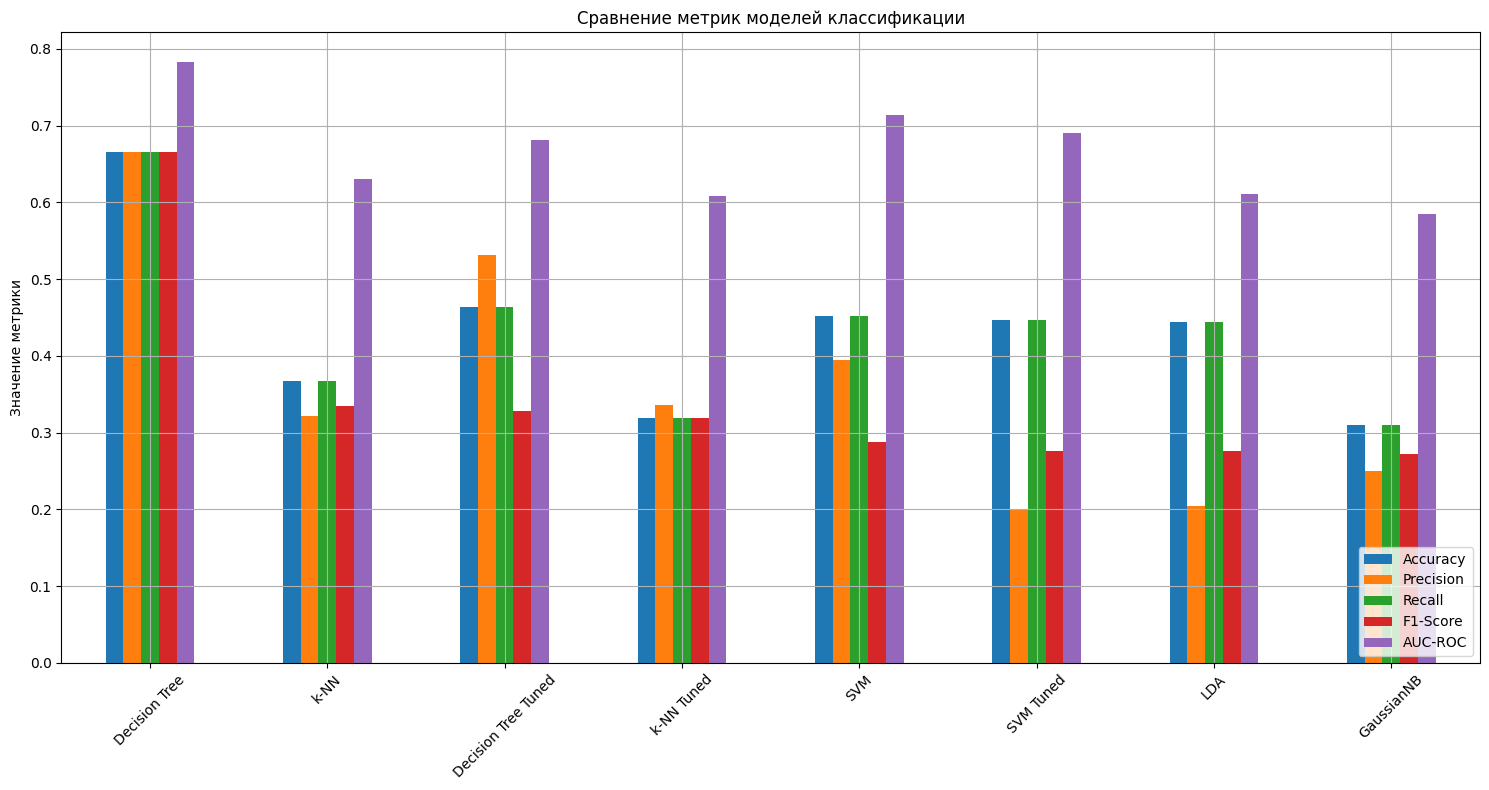

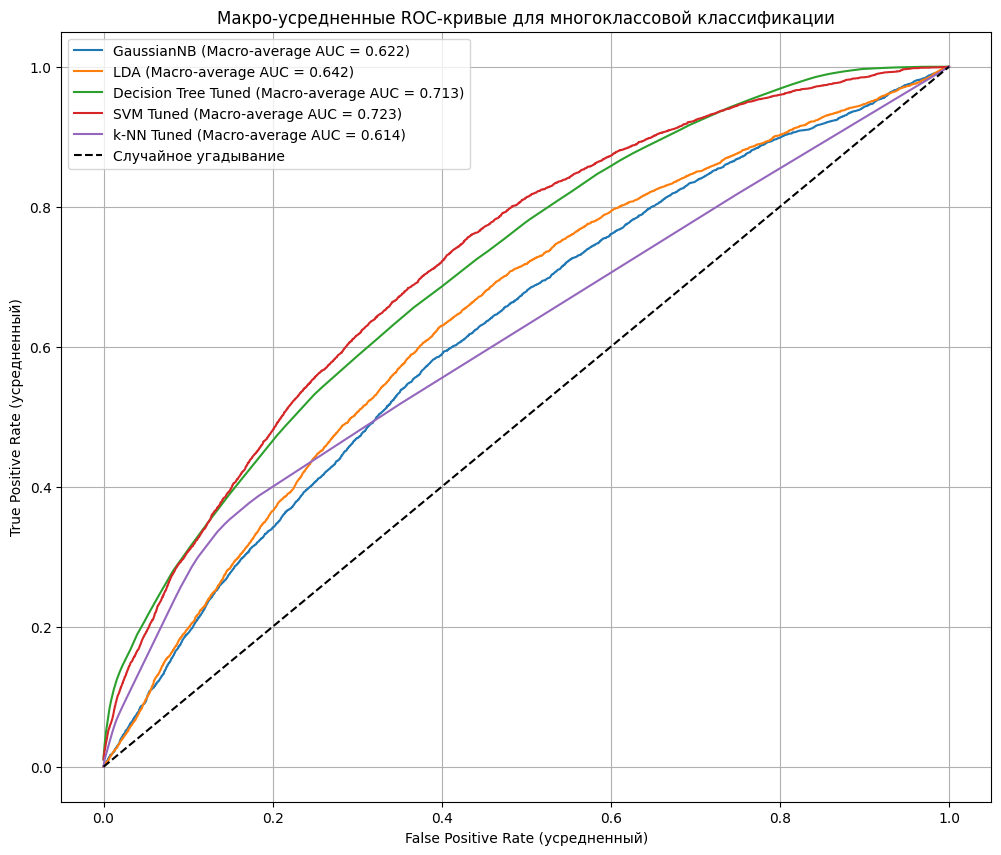

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
from numpy import interp

results_df = pd.DataFrame.from_dict(results, orient='index', 
                                   columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

results_df.sort_values('F1-Score', ascending=False).plot(kind='bar', figsize=(15, 8), grid=True)
plt.title('Сравнение метрик моделей классификации')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(12, 10))

models_to_plot = {
    'GaussianNB': gnb,
    'LDA': lda,
    'Decision Tree Tuned': grid_dt.best_estimator_,
    'SVM Tuned': grid_svm.best_estimator_,
    'k-NN Tuned': grid_knn.best_estimator_
}

for name, model in models_to_plot.items():
    y_proba = model.predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    macro_roc_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f'{name} (Macro-average AUC = {macro_roc_auc:.3f})')


plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
plt.xlabel('False Positive Rate (усредненный)')
plt.ylabel('True Positive Rate (усредненный)')
plt.title('Макро-усредненные ROC-кривые для многоклассовой классификации')
plt.legend()
plt.grid()
plt.show()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4213 - loss: 2.0669 - val_accuracy: 0.4500 - val_loss: 1.9618
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4458 - loss: 1.9926 - val_accuracy: 0.4500 - val_loss: 1.9333
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.9580 - val_accuracy: 0.4500 - val_loss: 1.9156
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.9446 - val_accuracy: 0.4500 - val_loss: 1.9000
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.9254 - val_accuracy: 0.4500 - val_loss: 1.8881
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.9121 - val_accuracy: 0.4500 - val_loss: 1.8781
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.9057 - val_accuracy: 0.4500 - val_loss: 1.8698
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 1.8947 - val_accuracy: 0.

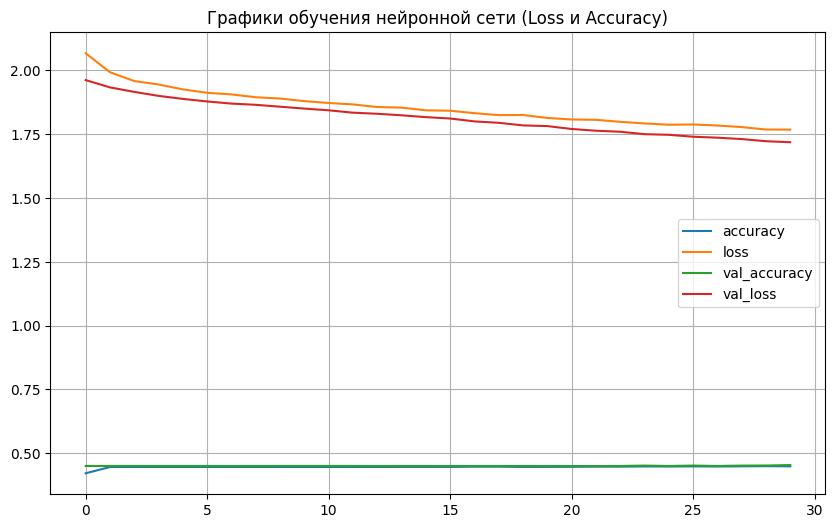

In [ ]:
num_classes = y_train.nunique()
y_train_nn = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_nn = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model_nn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_nn.summary()

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model_nn.fit(X_train, y_train_nn,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback],
                    verbose=1)

print("\n--- Neural Network ---")
y_proba_nn = model_nn.predict(X_test)
y_pred_nn = np.argmax(y_proba_nn, axis=1)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
roc_auc_nn = roc_auc_score(y_test, y_proba_nn, multi_class='ovr', average='weighted')

results['Neural Network'] = [accuracy_nn, precision_nn, recall_nn, f1_nn, roc_auc_nn]

print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")
print(f"AUC-ROC: {roc_auc_nn:.4f}\n")

pd.DataFrame(history.history).plot(figsize=(10, 6), grid=True)
plt.title('Графики обучения нейронной сети (Loss и Accuracy)')
plt.show()

- Результаты: Нейронная сеть показала довольно скромные результаты, оказавшись на уровне самых слабых моделей Scikit-Learn.
- Процесс обучения: Графики loss и accuracy показывают, что точность на валидационной выборке очень быстро вышла на плато в районе 0.45 и дальше не улучшалась. Это признак того, что модель не может извлечь из данных более сложной информации.
- Итог: Для данного набора табличных данных простая нейронная сеть не смогла составить конкуренцию классическим алгоритмам машинного обучения. Вероятно, для достижения лучших результатов потребовалась бы более сложная архитектура сети или большее количество данных.

Чтобы визуализировать данные обучения нейронной сети, нужно выполнить команду:

`tensorboard --logdir logs/fit`